# BERT Variants : ALBERT

Similar to BERT, the ALBERT model is pre-trained using the English Wikipedia and Toronto BookCorpus datasets. The BERT model is pre-trained using the
masked language modeling (MLM) and next sentence prediction (NSP) tasks. Similarly, the ALBERT model is pre-trained using the MLM task, but instead 
of using the NSP task, ALBERT uses a new task called sentence order prediction (SOP). But why not use the NSP task?

Sentence order prediction (SOP) :

The researchers of ALBERT pointed out that pre-training with the NSP task is not really useful and isn't a difficult task to perform compared to the 
MLM task. Also, the NSP task combines both topic prediction and coherence prediction into a single task. To alleviate this, researchers introduced the 
SOP task. SOP is based on inter-sentence coherence and not on topic prediction. Let's look at how the SOP task works in detail.
Similar to the next sentence prediction task, SOP is a binary classification task. In the next sentence prediction task, we train the model to predict
whether a sentence pair belongs to the isNext or notNext class, whereas in the SOP task, we train the model to predict whether a sentence order in a 
given sentence pair is swapped or not. 

BERT Vs ALBERT Performance : 

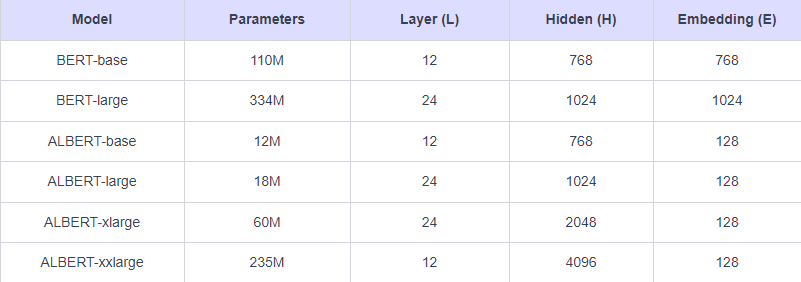


In [ ]:
# Suppressing "INFO" and "WARNING" messages by setting the verbosity of the Transformers library.
from transformers import logging
logging.set_verbosity_error()

# Import the necessary modules

In [2]:
from transformers import AlbertTokenizer, AlbertModel

# Loading the model and the tokenizer

In [3]:
model = AlbertModel.from_pretrained('albert-base-v2')
tokenizer = AlbertTokenizer.from_pretrained('albert-base-v2')

# preprocess the inputs

In [4]:
sentence = "Paris is a beautiful city" 
inputs = tokenizer(sentence, return_tensors="pt")

In [5]:
print(inputs)

{'input_ids': tensor([[   2, 1162,   25,   21, 1632,  136,    3]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1]])}


# Extracting the Embedding 

we just feed the inputs to the model and get the result. The model returns hidden_rep, which contains the hidden state representation of all the 
tokens from the final encoder layer, and cls_head, which contains the hidden state representation of the [CLS] token from the final encoder layer

The hidden_rep[0][0] contains the contextual embedding of the [CLS] token.

The hidden_rep[0][1] contains the contextual embedding of the 'Paris' token.

The hidden_rep[0][2] contains the contextual embedding of the 'is' token.

hidden_rep[0][6] contains the contextual embedding of the [SEP] token

In [6]:
objects = model(**inputs)
hidden_rep = objects.last_hidden_state

In [8]:
print(hidden_rep.shape)
print(hidden_rep[0][0])

torch.Size([1, 7, 768])
tensor([ 8.1377e-01, -2.1923e-01,  7.0965e-01, -8.3762e-02, -9.1877e-01,
        -4.3319e-01,  6.3536e-01, -7.0293e-01,  2.9163e-01,  2.6814e-01,
         1.1825e+00,  7.5952e-01,  4.8658e-01,  9.7709e-01,  1.3055e+00,
         2.7782e-02,  7.4772e-01,  6.5724e-02, -4.3754e-01, -4.1870e-01,
         2.6135e-01, -3.2317e+00,  5.7344e-01,  4.2397e-01,  2.8537e-01,
        -7.7882e-01,  1.7221e-01,  8.1312e-02,  1.3086e+00, -2.7584e+00,
        -1.4090e+00,  1.5111e+00,  1.4577e+00, -4.6638e-01,  1.1701e-01,
        -2.3313e+00, -2.1564e-01, -1.6803e-01, -1.4514e-01,  1.5810e-01,
         2.0603e-01,  5.6583e-01, -1.4213e+00, -2.0782e-01,  1.0610e+00,
         1.9396e+00, -9.4811e-01,  8.6039e-01,  3.4406e-01, -2.8977e-02,
         7.6713e-01, -1.2607e+00, -3.9023e-01,  1.3234e+00,  6.6875e-01,
         7.9670e-01,  2.8161e-01,  6.5813e-03, -4.1506e-01,  1.1746e+00,
         7.6764e-02, -1.5090e+00, -4.1609e-01, -9.3307e-01,  5.5301e-01,
        -3.3460e-01,  5.427

In [9]:
print(hidden_rep.shape)
print(hidden_rep[0][1])

torch.Size([1, 7, 768])
tensor([-4.1863e-01, -1.1661e+00,  7.1195e-02, -1.9672e-01,  3.6914e-01,
         3.4213e-01,  8.7647e-01, -6.7363e-01,  7.4824e-01,  9.6918e-01,
        -2.1542e-01, -7.1252e-01, -3.9186e-01,  6.2026e-01,  4.8787e-01,
         3.9269e-01, -2.3094e-02, -3.7432e-01, -6.0482e-01, -2.4565e-01,
        -6.4040e-01,  7.8725e-02,  1.1948e+00,  1.0953e+00,  7.0187e-01,
        -1.7497e+00,  6.1894e-02, -2.8784e-01,  8.6948e-01,  3.3998e-01,
        -6.9241e-01, -5.0814e-01, -1.0588e+00,  9.0006e-02, -8.0995e+00,
        -5.9259e-01, -5.6159e-01,  2.0710e-02, -2.0775e-01, -4.5426e-01,
        -1.8417e-01, -4.1401e-01, -7.7794e-02,  2.8874e-01, -3.4934e-01,
         4.2924e-01, -6.1545e-01,  9.6657e-02,  1.5659e+00,  1.7413e+00,
         8.9832e-01, -6.0203e-01, -1.2557e-01, -9.3364e-02,  6.5572e-01,
         6.4592e-01, -3.6040e-01,  1.1278e+00, -5.1019e-01,  8.4595e-01,
        -7.8091e-01,  1.2925e-01,  2.7299e-01, -6.7068e-02, -1.6884e+00,
        -2.7458e-01,  1.734

In [10]:
print(hidden_rep.shape)
print(hidden_rep[0][2])

torch.Size([1, 7, 768])
tensor([ 1.0005e+00, -1.3621e+00,  4.5777e-01, -1.7431e+00, -5.7638e-02,
         4.8219e-02,  6.7498e-01,  4.1498e-02,  9.0206e-01,  3.4292e-01,
         8.1778e-01,  7.8438e-01, -2.0105e-01,  4.7230e-01,  1.5509e+00,
        -1.6714e+00,  1.1371e+00,  4.0845e-01,  5.3428e-01, -1.1185e+00,
        -1.0806e-01, -2.7766e-02,  1.6637e+00, -2.4173e-02, -4.9008e-01,
         1.5002e+00,  3.9679e-01, -1.3755e+00, -5.2784e-01, -1.3323e+00,
        -1.0433e+00, -7.1367e-01, -6.6564e-01,  1.4170e-01, -6.4678e+00,
         6.8398e-01,  1.3159e+00,  2.5037e-01,  9.8378e-01, -1.3690e+00,
        -1.3880e-01, -8.0812e-01,  7.3917e-01,  6.3312e-01, -6.5982e-01,
        -9.2135e-01, -8.6026e-01, -8.6544e-01,  7.3081e-01,  7.5069e-01,
         7.5244e-01,  9.9458e-02, -5.5630e-01,  4.0859e-01, -3.4400e-01,
         1.8504e+00, -5.5152e-01, -1.4221e-01,  1.9850e-01, -1.1844e+00,
         6.1609e-02, -7.7137e-01,  1.4762e+00, -9.7387e-01,  8.9222e-01,
        -9.5604e-01, -1.744

In [11]:
print(hidden_rep.shape)
print(hidden_rep[0][6])

torch.Size([1, 7, 768])
tensor([ 6.8029e-02,  1.2460e-01, -6.6747e-02,  1.7190e-01,  1.5373e-01,
        -9.0570e-02,  3.6044e-01,  8.2058e-02, -1.4593e-01, -1.1024e-02,
         1.3099e-01,  4.0397e-01,  3.3364e-01,  1.5362e-01,  1.8158e-01,
        -1.4081e-02,  1.5076e-02,  2.0786e-01, -2.1862e-01,  1.7406e-01,
         1.7142e-01,  3.2339e-03,  6.2745e-02, -2.0178e-01,  2.6421e-01,
        -7.0221e-02,  2.9927e-01,  7.0780e-02, -1.6695e-01,  1.8546e-01,
        -9.9896e-03, -7.4201e-02,  5.3338e-01, -7.3407e-02,  5.5829e+00,
        -1.0064e-01,  1.2566e-01, -2.5766e-01,  5.8024e-02, -2.8583e-01,
         2.4725e-01, -7.9668e-02,  4.5631e-02, -5.9354e-02, -1.3925e-01,
        -3.1118e-01,  3.0868e-01, -6.7113e-02, -1.5733e-01, -6.8211e-02,
        -1.1577e-01,  1.2801e-01, -3.0085e-01,  6.9989e-02, -8.8995e-02,
         5.4666e-02,  1.7225e-01,  3.8596e-02, -7.7589e-02,  1.8120e-01,
        -2.7722e-02, -8.9755e-02,  4.7113e-02, -1.4064e-01, -2.4610e-01,
         2.9821e-01,  6.781